Loading python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Importing the dataset

In [2]:
rating_features = pd.read_csv("rating_features.csv")
rental_price = pd.read_csv("rental_price.csv")

Knowing more about datasets

In [3]:
print(rating_features.head())
print(rating_features.info())
print(rental_price.describe())
print(rental_price.isnull().sum())


   accommodates                                          amenities  \
0             6  {"Cable TV",Internet,"Wireless Internet","Air ...   
1             2  {"Air Conditioning",Heating,"Family/Kid Friend...   
2             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
3             2  {TV,"Cable TV",Internet,"Wireless Internet","A...   
4             6  {TV,"Cable TV",Internet,"Wireless Internet","A...   

   availability_30  bathrooms  bed_type  bedrooms  beds  \
0                0        2.5  Real Bed       1.0   3.0   
1               29        0.0     Futon       1.0   1.0   
2               30        1.5  Real Bed       1.0   1.0   
3               30        1.5  Real Bed       1.0   1.0   
4               27        2.0  Real Bed       3.0   3.0   

   calculated_host_listings_count cancellation_policy  guests_included  ...  \
0                               1            moderate                1  ...   
1                               1            moderate             

Data Cleaning

In [4]:
# Define the columns you want to handle for missing values
missing_columns = [
    "bathrooms", "bedrooms", "beds", "host_listings_count", 
    "review_scores_checkin", "review_scores_communication", "review_scores_location", 
    "review_scores_rating", "review_scores_value"
]

# Handle missing values for the selected columns
rating_features[missing_columns] = rating_features[missing_columns].fillna(rating_features[missing_columns].median())
rating_features[missing_columns] = rating_features[missing_columns].fillna(rating_features[missing_columns].mode().iloc[0])


In [5]:
# Assuming 'price' is the column in the DataFrame containing the rental prices
rental_price['currency'] = rental_price['price'].str.extract(r'(\$)')  # Extract the dollar symbol
rental_price['price_numeric'] = rental_price['price'].str.replace(r'[$,]', '', regex=True).astype(float)  # Extract numeric values

# Drop the original 'price' column if no longer needed
rental_price.drop(columns=['price'], inplace=True)

# Display the updated DataFrame
print(rental_price)

# Handle missing values for the target variable
rental_price.fillna(rental_price['price_numeric'].median(), inplace=True)

     currency  price_numeric
0           $          300.0
1           $           99.0
2           $          100.0
3           $          100.0
4           $          599.0
...       ...            ...
5829        $          125.0
5830        $          179.0
5831        $           85.0
5832        $           25.0
5833        $          120.0

[5834 rows x 2 columns]


In [6]:
rating_features["host_is_superhost"] = rating_features["host_is_superhost"].fillna(rating_features["host_is_superhost"].mode()[0])

In [7]:
rating_features.head(40)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,calculated_host_listings_count,cancellation_policy,guests_included,...,longitude(East),maximum_nights,number_of_reviews,property_type,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,Real Bed,1.0,3.0,1,moderate,1,...,114.059600,10,1,House,10.0,10.0,10.0,100.0,10.0,Private room
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,Futon,1.0,1.0,1,moderate,1,...,114.043225,7,0,Camper/RV,10.0,10.0,10.0,98.0,10.0,Private room
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079426,1125,0,House,10.0,10.0,10.0,98.0,10.0,Private room
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,Real Bed,1.0,1.0,2,flexible,1,...,114.079035,1125,0,House,10.0,10.0,10.0,98.0,10.0,Private room
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,Real Bed,3.0,3.0,2,strict,1,...,114.055590,1125,0,House,10.0,10.0,10.0,98.0,10.0,Entire home/apt
5,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.0,Real Bed,1.0,1.0,1,flexible,1,...,114.036466,1125,0,House,10.0,10.0,10.0,98.0,10.0,Private room
6,2,"{""Wireless Internet"",""Air Conditioning"",""Pets ...",0,1.0,Futon,1.0,1.0,1,flexible,2,...,114.023692,1125,0,Bed & Breakfast,10.0,10.0,10.0,98.0,10.0,Private room
7,2,"{TV,Internet,""Wireless Internet"",""Air Conditio...",16,1.0,Real Bed,1.0,1.0,1,moderate,2,...,114.052922,7,2,House,10.0,10.0,10.0,100.0,10.0,Private room
8,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",29,1.0,Real Bed,1.0,3.0,1,flexible,2,...,114.074536,1125,0,House,10.0,10.0,10.0,98.0,10.0,Private room
9,2,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",29,1.0,Real Bed,1.0,1.0,1,moderate,2,...,114.073911,1125,20,House,10.0,10.0,10.0,99.0,10.0,Private room


In [8]:
# Handling categorical variables

rating_features = pd.get_dummies(rating_features, columns=["property_type", "bed_type", "room_type", "cancellation_policy"])


In [9]:
# Combine the data

data = pd.concat([rating_features, rental_price], axis=1)


In [10]:
# Convert 't' to 1 and 'f' to 0
data['has_availability'] = data['has_availability'].map({'t': 1, 'f': 0})
data['host_is_superhost'] = data['host_is_superhost'].map({'t': 1, 'f': 0})
data['instant_bookable'] = data['instant_bookable'].map({'t': 1, 'f': 0})

Exploratory Data Analysis (EDA)

In [11]:
# Statistical Analysis
print(data.describe())
data.head()

       accommodates  availability_30    bathrooms     bedrooms        beds  \
count   5834.000000      5834.000000  5834.000000  5834.000000  5834.00000   
mean       4.388584        16.521083     1.475917     1.738258     2.21169   
std        2.689105        12.322443     0.772776     1.136291     1.64788   
min        1.000000         0.000000     0.000000     0.000000     1.00000   
25%        2.000000         1.000000     1.000000     1.000000     1.00000   
50%        4.000000        20.000000     1.000000     1.000000     2.00000   
75%        6.000000        29.000000     2.000000     2.000000     3.00000   
max       16.000000        30.000000     8.000000    10.000000    16.00000   

       calculated_host_listings_count  guests_included  has_availability  \
count                     5834.000000      5834.000000            5834.0   
mean                         1.901097         1.880699               1.0   
std                          2.282242         1.773520               

,accommodates,amenities,availability_30,bathrooms,bedrooms,beds,calculated_host_listings_count,guests_included,has_availability,host_is_superhost,...,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_no_refunds,cancellation_policy_strict,cancellation_policy_super_strict_30,currency,price_numeric
0,6,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",0,2.5,1.0,3.0,1,1,1,0,...,False,True,False,False,True,False,False,False,$,300.0
1,2,"{""Air Conditioning"",Heating,""Family/Kid Friend...",29,0.0,1.0,1.0,1,1,1,0,...,False,True,False,False,True,False,False,False,$,99.0
2,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,1.0,1.0,2,1,1,0,...,False,True,False,True,False,False,False,False,$,100.0
3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,1.5,1.0,1.0,2,1,1,0,...,False,True,False,True,False,False,False,False,$,100.0
4,6,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",27,2.0,3.0,3.0,2,1,1,0,...,True,False,False,False,False,False,True,False,$,599.0


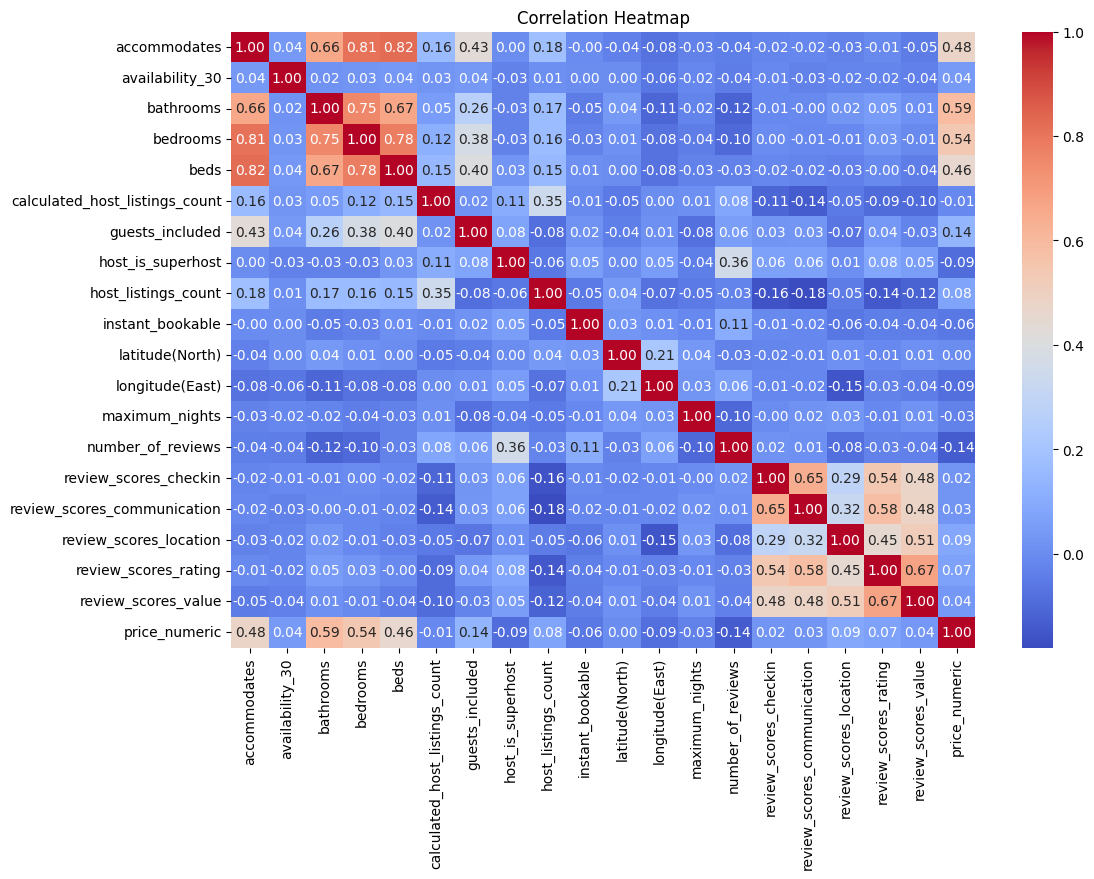

In [12]:
# Filter only numeric columns
data_numeric = data.drop(["amenities","has_availability"], axis=1)

# Ensure you select only numeric columns for correlation
data_numeric = data_numeric.select_dtypes(include=["number"])

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Feature Selection

In [13]:
# Removing Low-Variance Features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
reduced_data = selector.fit_transform(data_numeric)

In [14]:
from sklearn.ensemble import RandomForestRegressor

# Define X and y
X = data.drop(["price_numeric","amenities", "currency"], axis=1)  # Features (drop the target column)
y = data["price_numeric"]  # Target variable

# Initialize and fit the RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

# The model fits the random forest model and prints the feature importances sorted in descending order

bathrooms                              2.830590e-01
bedrooms                               2.110945e-01
latitude(North)                        9.468063e-02
maximum_nights                         8.272081e-02
longitude(East)                        6.681593e-02
availability_30                        5.126393e-02
number_of_reviews                      4.208531e-02
accommodates                           2.893252e-02
beds                                   2.573537e-02
host_listings_count                    2.239202e-02
property_type_Other                    1.278756e-02
guests_included                        1.097312e-02
calculated_host_listings_count         1.088231e-02
cancellation_policy_flexible           6.975277e-03
host_is_superhost                      6.468774e-03
room_type_Entire home/apt              6.025088e-03
cancellation_policy_strict             5.482144e-03
review_scores_rating                   5.305446e-03
review_scores_value                    3.711213e-03
property_typ

Explaination:

Most Important Features: bathrooms, bedrooms, and latitude(North) are the most influential in predicting the price, as they have high importance values.
Low Importance Features: has_availability, and rare property types like property_type_Hut and property_type_Boat, have very low or zero importance, meaning they don’t significantly affect the price prediction.
Categorical Variables: Features like property_type_* and room_type_* have moderate to low importance, with more common categories being slightly more impactful.
Key Takeaways:
Focus on high-importance features (bathrooms, bedrooms, latitude(North)) for better predictions.
Consider removing low-importance features to simplify the model and improve efficiency.

Data Preprocessing for Modeling

In [15]:
# Train-test split:
from sklearn.model_selection import train_test_split
X = data.drop(["price_numeric","amenities", "currency"], axis=1)  # Features (drop the target column)
y = data["price_numeric"]  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Standardize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Apply and Compare Algorithms

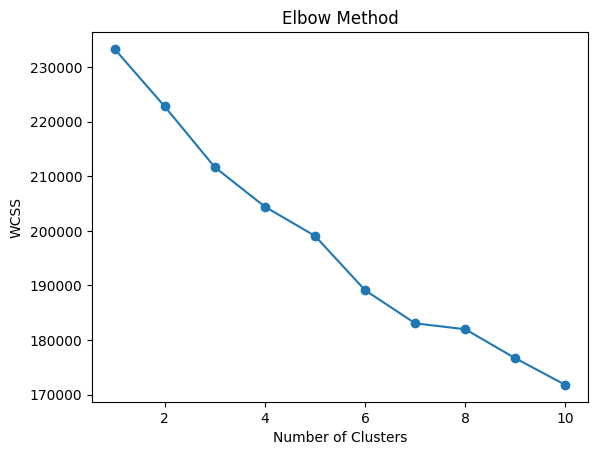

In [17]:
# K- means clustering
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Model Evoluation

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR(kernel='linear')
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    # Store results
    results[model_name] = {
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

# For K-Means clustering, we'll use silhouette score as the evaluation metric.
kmeans = KMeans(n_clusters=5, random_state=42)  # Assuming 5 clusters
kmeans.fit(X_train)

# You can calculate the silhouette score (which works for clustering models)
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X_test, kmeans.predict(X_test))

# Add K-Means score to results
results["K-Means"] = {
    "Silhouette Score": sil_score
}

# Print out the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("="*30)


Model: Linear Regression
R²: 0.4272
MAE: 161.8865
MSE: 101760.0488
Model: Random Forest
R²: 0.5233
MAE: 126.2598
MSE: 84692.8104
Model: Gradient Boosting
R²: 0.5237
MAE: 126.6779
MSE: 84619.1167
Model: SVR
R²: 0.3171
MAE: 144.0218
MSE: 121317.8907
Model: K-Means
Silhouette Score: 0.1233


Visualize predictions

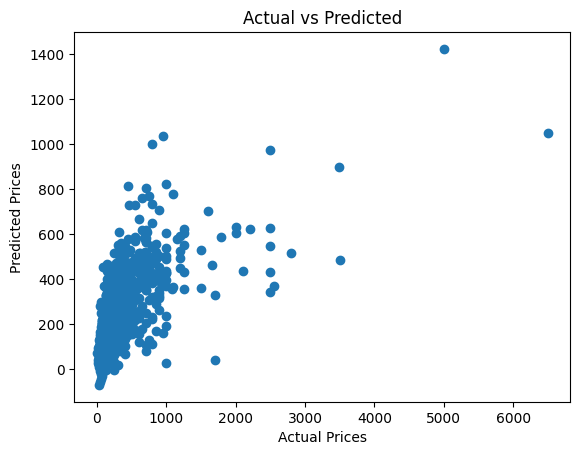

In [20]:

plt.scatter(y_test, model.predict(X_test))
plt.title("Actual vs Predicted")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


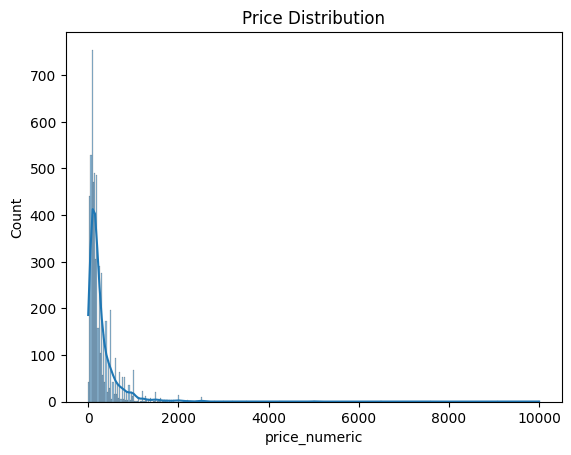

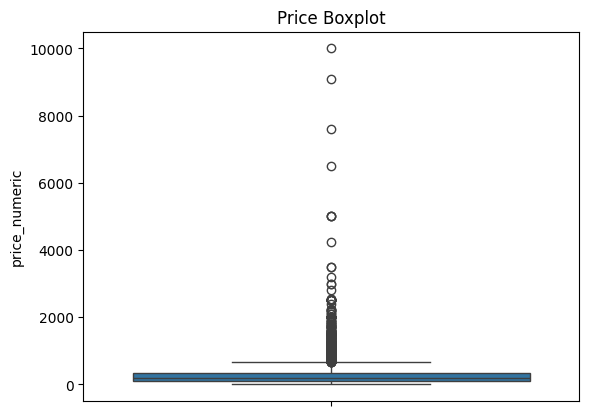

In [21]:
sns.histplot(data['price_numeric'], kde=True)
plt.title('Price Distribution')
plt.show()

sns.boxplot(data['price_numeric'])
plt.title('Price Boxplot')
plt.show()



In [ ]:
# Histogram: Shows the frequency of different price ranges.
# Boxplot: Highlights the median, quartiles, and any outliers in the price data.

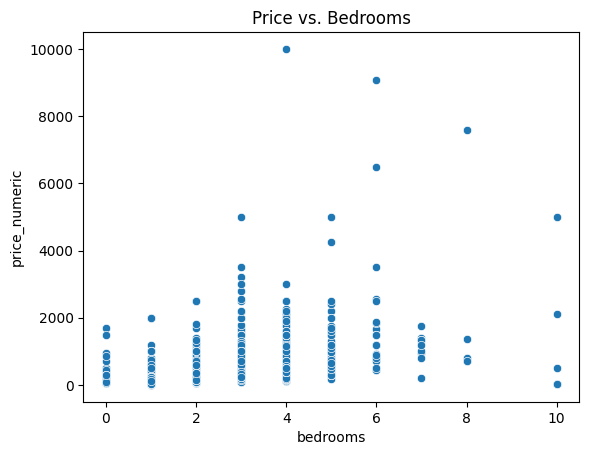

In [22]:
sns.scatterplot(x=data['bedrooms'], y=data['price_numeric'])
plt.title('Price vs. Bedrooms')
plt.show()


In [ ]:
# A scatter plot can show if there’s a linear or non-linear relationship between the number of bedrooms and price.

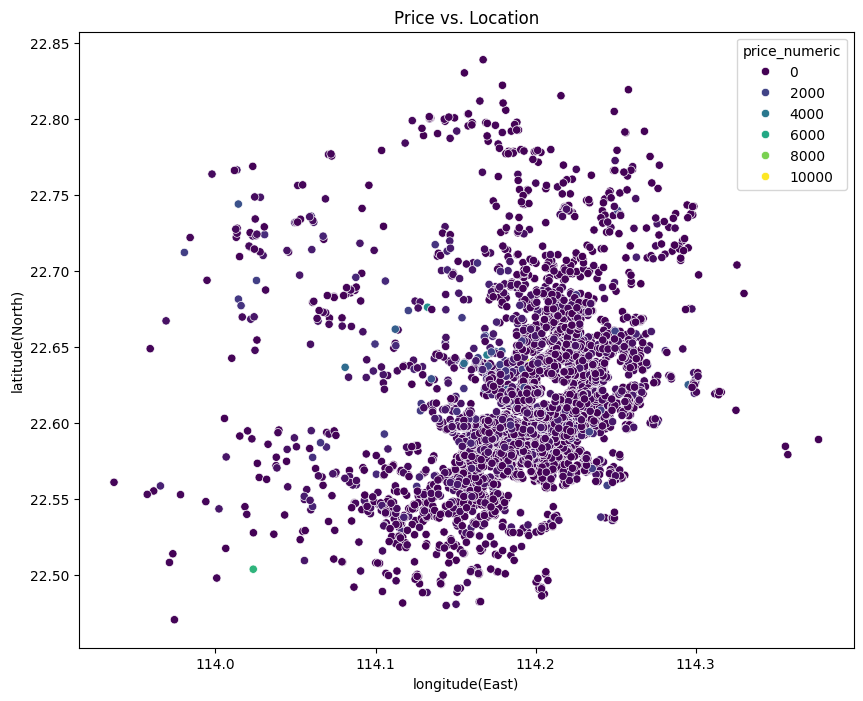

In [23]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=data['longitude(East)'], y=data['latitude(North)'], hue=data['price_numeric'], palette='viridis')
plt.title('Price vs. Location')
plt.show()


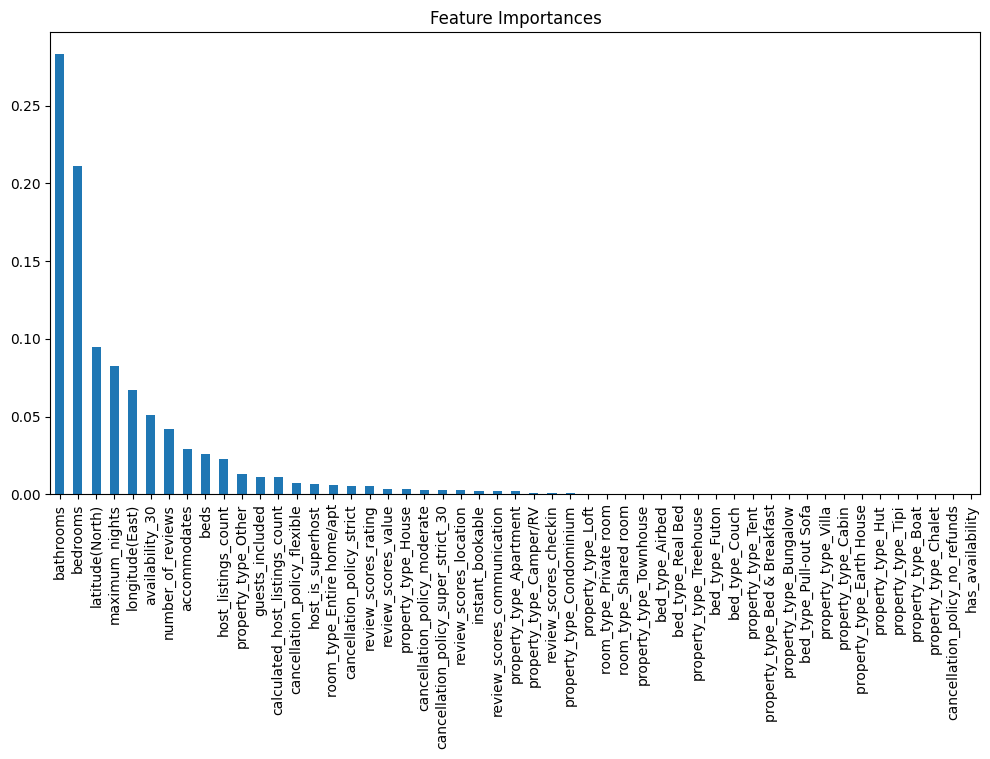

In [24]:
feature_importances.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importances')
plt.show()


In [ ]:
# A bar plot can be used to show the importance of each feature, as generated by the RandomForestRegressor

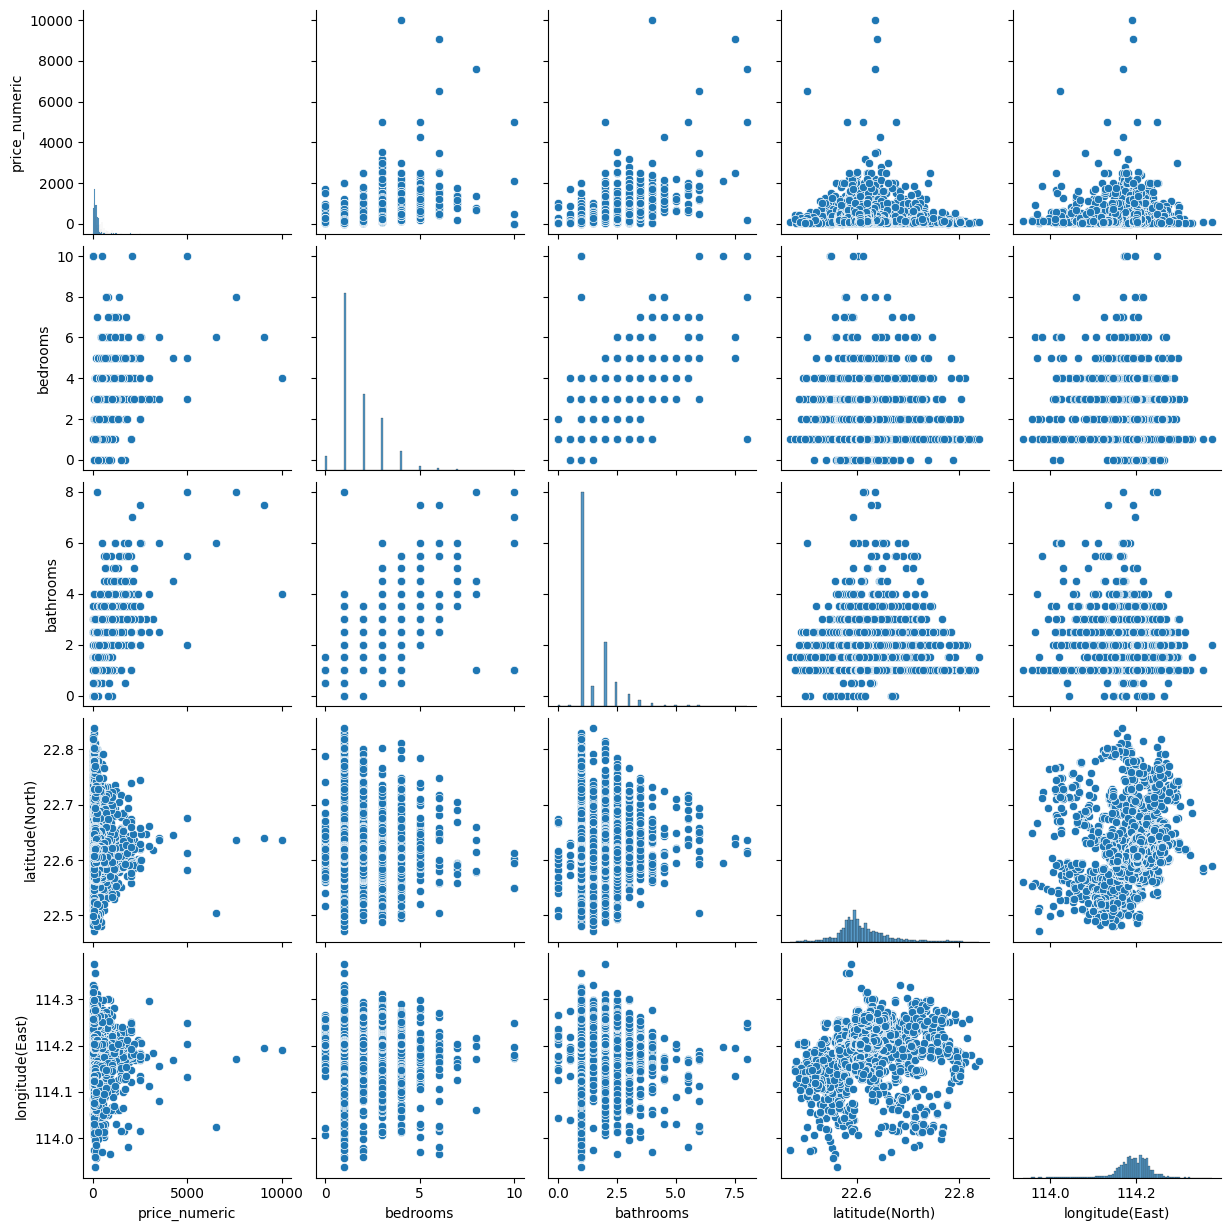

In [25]:
sns.pairplot(data[['price_numeric', 'bedrooms', 'bathrooms', 'latitude(North)', 'longitude(East)']])
plt.show()
# Visualize relationships between multiple numeric variables at once